<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Boston-house-prices-data" data-toc-modified-id="Boston-house-prices-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boston house prices data</a></span></li><li><span><a href="#Splitting-the-data-into-train-and-test-set" data-toc-modified-id="Splitting-the-data-into-train-and-test-set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Splitting the data into train and test set</a></span></li><li><span><a href="#Examine-AGE-column" data-toc-modified-id="Examine-AGE-column-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine <code>AGE</code> column</a></span></li><li><span><a href="#Examine-the-model-performance-with-different-data" data-toc-modified-id="Examine-the-model-performance-with-different-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Examine the model performance with different data</a></span><ul class="toc-item"><li><span><a href="#Performance-of-Completed-Data" data-toc-modified-id="Performance-of-Completed-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Performance of Completed Data</a></span></li><li><span><a href="#Performance-of-Dropped-Data" data-toc-modified-id="Performance-of-Dropped-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Performance of Dropped Data</a></span></li><li><span><a href="#Performance-of-Imputed-Data" data-toc-modified-id="Performance-of-Imputed-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Performance of Imputed Data</a></span></li></ul></li></ul></div>

# Missing Value Imputation with Linear Regression

`boston_dropna_df` will be a dataset to see what would happen if we just dropped rows with missing values.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
%matplotlib inline

## Boston house prices data

In [2]:
boston = load_boston() # Dataset from the sklearn library

In [3]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.read_pickle('data/boston_df.p')

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_df.shape

(506, 14)

## Splitting the data into train and test set

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1],boston_df.iloc[:,-1:], random_state = 1)

In [8]:
map(pd.np.shape,[X_train, X_test, y_train, y_test])

/var/folders/4n/y3z900hx7yj7qq3g3q2t8y7m0000gn/T/ipykernel_14284/2239967907.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  map(pd.np.shape,[X_train, X_test, y_train, y_test])


In [9]:
y_train

,y
502,20.6
172,23.1
80,28.0
46,20.0
318,23.1
...,...
255,20.9
72,22.8
396,12.5
235,24.0


These testing and training sets form our full dataset, we have prepared some data with missing vaues

## Examine `AGE` column

In [10]:
#read the data into two dataframes
boston_dropna_df = pd.read_pickle('data/boston_dropna_df.p') 

In [11]:
boston_impute_df = boston_dropna_df.copy()

In [12]:
boston_dropna_df['AGE'].isnull().sum()

95

In [13]:
boston_impute_df['AGE'].isnull().sum()

95

`boston_dropna_df` will be a dataset to see what would happen if we just dropped rows with missing values

In [14]:
boston_dropna_df.dropna(subset=['AGE'],axis=0,inplace=True)

In [15]:
boston_dropna_df['AGE'].isnull().sum()

0

In [16]:
boston_impute_df['AGE'].isnull().sum()

95

In [17]:
boston_dropna_df.shape

(284, 14)

In [18]:
boston_dropna_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0


## Examine the model performance with different data

In [19]:
lm_fitting_df = boston_dropna_df.drop('y',axis=1)
lm_fitting_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08


Our target now is the 'AGE' column, we will use the `boston_dropna_df` as the data to fit, we can use data with missing values to train a model

In [20]:
lm_for_impute = LinearRegression() #instatiate

In [22]:
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'AGE']],lm_fitting_df['AGE']) #fit

LinearRegression()

In [23]:
boston_impute_df[boston_impute_df['AGE'].isnull()].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
7,0.14455,12.5,7.87,0.0,0.524,6.172,NaN,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,NaN,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,NaN,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
22,1.23247,0.0,8.14,0.0,0.538,6.142,NaN,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
49,0.21977,0.0,6.91,0.0,0.448,5.602,NaN,6.0877,3.0,233.0,17.9,396.90,16.20,19.4


In [24]:
lm_for_impute.predict(boston_impute_df.drop(['AGE','y'],axis=1)) 
#this uses the other features to predict 'AGE' with the model

array([ 55.54169435,  55.07036138,  52.62921279,  44.74737697,
        60.03002858,  70.11902496,  53.45354189,  60.7868362 ,
        56.71243725,  61.59536671,  66.10198784,  62.29115387,
        60.47460428,  68.72231216,  80.16101352,  72.0958641 ,
        79.32670387,  78.48991559,  73.07135463,  71.53859011,
        69.2665315 ,  74.83191928,  71.38293247,  80.76981887,
        89.82952408,  77.57092755,  64.08732792,  65.72801111,
        59.69618849,  62.43967841,  38.2300336 ,  46.30085778,
        48.21844208,  50.07775903,  55.55916465,  70.6686775 ,
        52.32604158,  42.75988831,  38.50707539,  35.35046262,
        36.64148452,  40.35396953,  21.50470684,  16.97045822,
        16.00616149,  39.71182774,  42.23958175,  47.0534663 ,
        39.24097878,  31.26427789,  43.04394218,  39.15922121,
        47.29790301,  48.91127757,  43.95572658,  47.44971127,
        52.45806176,  54.02131554,  60.01513769,  56.95081278,
        52.06359895,  44.92205754,  46.78507719,  44.51

In [25]:
boston_impute_df['AGE'][boston_impute_df['AGE'].isnull()] = lm_for_impute.predict(boston_impute_df.drop(['AGE','y'],axis=1))

<AxesSubplot:>

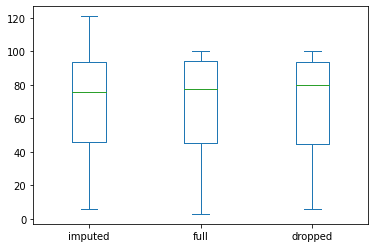

In [26]:
boxplot = pd.DataFrame({'imputed': boston_impute_df['AGE'],'full': boston_df['AGE'],'dropped': boston_dropna_df['AGE']})
boxplot.plot(kind='box')

So these are the imputed values predicted by the `lm` trained on the data that have a value for 'AGE'.

Predicting the price with the full data,

\begin{equation}
y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}


### Performance of Completed Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1],
                                                    boston_df.iloc[:,-1:],
                                                    random_state=111)

In [28]:
map(pd.np.shape,[X_train, X_test, y_train, y_test])

/var/folders/4n/y3z900hx7yj7qq3g3q2t8y7m0000gn/T/ipykernel_14284/2239967907.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  map(pd.np.shape,[X_train, X_test, y_train, y_test])


In [29]:
lm_full = LinearRegression()
lm_full.fit(X_train,y_train)

LinearRegression()

In [34]:
print ('r-squared for completed model = ',lm_full.score(X_test,y_test))

r-squared for completed model =  0.6276426698083191


### Performance of Dropped Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(boston_dropna_df.iloc[:,:-1],
                                                    boston_dropna_df.iloc[:,-1:],
                                                    random_state=111)

In [33]:
lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)

print ('r-squared for this model = ',lm_impute.score(X_test,y_test))

r-squared for this model =  0.621927059680814


### Performance of Imputed Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(boston_impute_df.iloc[:,:-1],
                                                    boston_impute_df.iloc[:,-1:],
                                                    random_state=111)

In [36]:
lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)

print ('r-squared for this model = ',lm_impute.score(X_test,y_test))

r-squared for this model =  0.7337099982198043
